<a href="https://colab.research.google.com/github/KPorus/machine-learning-and-python/blob/main/Telco_Customer_Churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [226]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("borhanitrash/telco-customer-churn")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/borhanitrash/telco-customer-churn/versions/1


In [227]:
import pandas as pd
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE

df = pd.read_csv("/root/.cache/kagglehub/datasets/borhanitrash/telco-customer-churn/versions/1/Telco Customer Churn/train.csv")
df.head()

,Age,Avg Monthly GB Download,Avg Monthly Long Distance Charges,Churn Category,Churn Reason,Churn Score,City,CLTV,Contract,Country,...,Tenure in Months,Total Charges,Total Extra Data Charges,Total Long Distance Charges,Total Refunds,Total Revenue,Under 30,Unlimited Data,Zip Code,Churn
0,72,4,19.44,NaN,NaN,51,San Mateo,4849,Two Year,United States,...,25,2191.15,0,486.00,0.0,2677.15,0,1,94403,0
1,27,59,45.62,NaN,NaN,27,Sutter Creek,3715,Month-to-Month,United States,...,35,3418.20,0,1596.70,0.0,5014.90,1,1,95685,0
2,59,0,16.07,NaN,NaN,59,Santa Cruz,5092,Month-to-Month,United States,...,46,851.20,0,739.22,0.0,1590.42,0,0,95064,0
3,25,27,0.00,NaN,NaN,49,Brea,2068,One Year,United States,...,27,1246.40,30,0.00,0.0,1276.40,1,0,92823,0
4,31,21,17.22,Dissatisfaction,Network reliability,88,San Jose,4026,One Year,United States,...,58,3563.80,0,998.76,0.0,4562.56,0,1,95117,1


<Axes: >

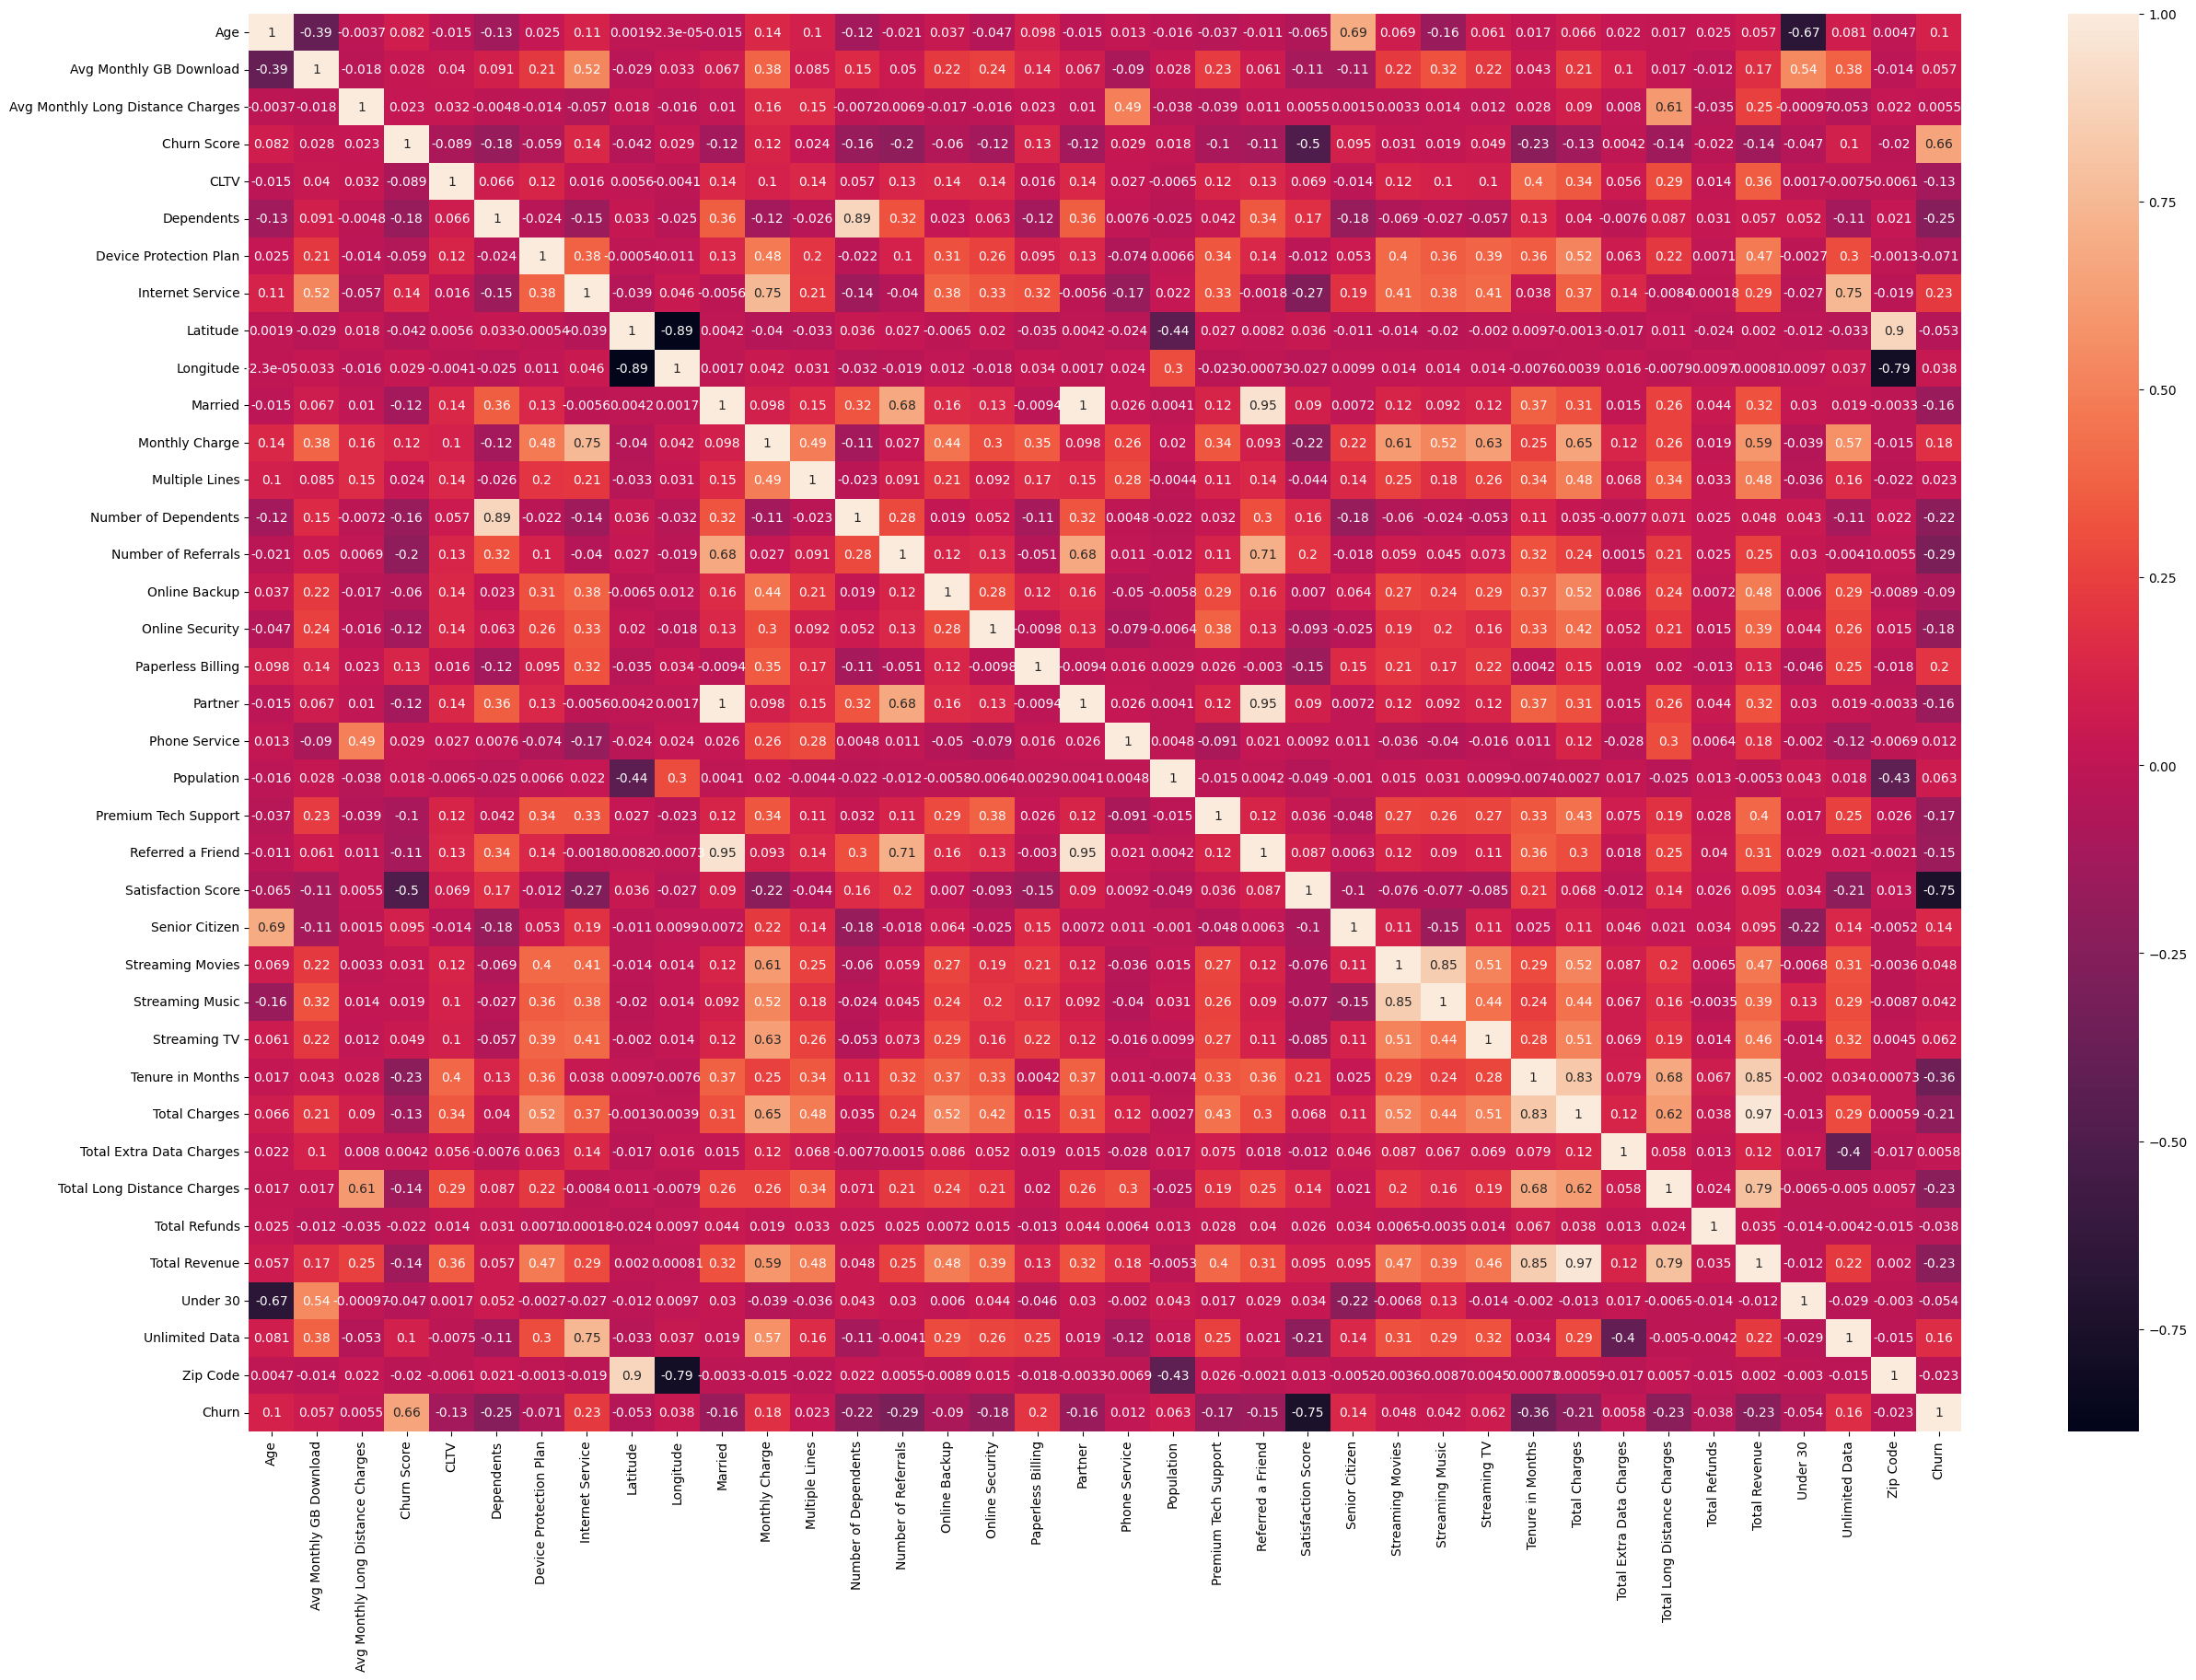

In [228]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(30, 20))
numeric_cols = df.select_dtypes(include=['number']).columns
sns.heatmap(df[numeric_cols].corr(), annot=True)

In [229]:
correlation_matrix = df[numeric_cols].corr()
churn_corr = correlation_matrix['Churn'].sort_values(ascending=False)
print(churn_corr)

Churn                                1.000000
Churn Score                          0.660032
Internet Service                     0.225285
Paperless Billing                    0.197347
Monthly Charge                       0.180403
Unlimited Data                       0.163029
Senior Citizen                       0.136332
Age                                  0.102103
Population                           0.063483
Streaming TV                         0.061634
Avg Monthly GB Download              0.057114
Streaming Movies                     0.048197
Streaming Music                      0.041726
Longitude                            0.037626
Multiple Lines                       0.023446
Phone Service                        0.012054
Total Extra Data Charges             0.005764
Avg Monthly Long Distance Charges    0.005529
Zip Code                            -0.023083
Total Refunds                       -0.038499
Latitude                            -0.052754
Under 30                          

In [230]:
df.columns

Index(['Age', 'Avg Monthly GB Download', 'Avg Monthly Long Distance Charges',
       'Churn Category', 'Churn Reason', 'Churn Score', 'City', 'CLTV',
       'Contract', 'Country', 'Customer ID', 'Customer Status', 'Dependents',
       'Device Protection Plan', 'Gender', 'Internet Service', 'Internet Type',
       'Lat Long', 'Latitude', 'Longitude', 'Married', 'Monthly Charge',
       'Multiple Lines', 'Number of Dependents', 'Number of Referrals',
       'Offer', 'Online Backup', 'Online Security', 'Paperless Billing',
       'Partner', 'Payment Method', 'Phone Service', 'Population',
       'Premium Tech Support', 'Quarter', 'Referred a Friend',
       'Satisfaction Score', 'Senior Citizen', 'State', 'Streaming Movies',
       'Streaming Music', 'Streaming TV', 'Tenure in Months', 'Total Charges',
       'Total Extra Data Charges', 'Total Long Distance Charges',
       'Total Refunds', 'Total Revenue', 'Under 30', 'Unlimited Data',
       'Zip Code', 'Churn'],
      dtype='object')

In [231]:
features_to_keep = [
    'Age', 'Senior Citizen', 'Unlimited Data', 'Monthly Charge', 'Churn Score','Device Protection Plan',
    'Internet Service', 'Paperless Billing', 'Tenure in Months', 'Online Backup', 'Online Security',
    'Satisfaction Score','Churn'
]
new_df = df[features_to_keep]

new_df.head(50)

,Age,Senior Citizen,Unlimited Data,Monthly Charge,Churn Score,Device Protection Plan,Internet Service,Paperless Billing,Tenure in Months,Online Backup,Online Security,Satisfaction Score,Churn
0,72,1,1,88.40,51,1,1,0,25,1,0,3,0
1,27,0,1,95.50,27,1,1,0,35,0,0,3,0
2,59,0,0,19.60,59,0,0,0,46,0,0,5,0
3,25,0,0,45.85,49,1,1,1,27,1,0,4,0
4,31,0,1,60.30,88,1,1,0,58,1,1,2,1
5,32,0,0,100.95,81,1,1,1,3,0,0,1,1
6,36,0,1,89.25,77,0,1,1,24,0,1,3,0
7,48,0,0,100.55,79,1,1,1,63,1,1,2,1
8,72,1,1,111.65,75,1,1,0,72,1,0,5,0
9,54,0,1,60.95,78,0,1,0,2,1,1,4,0


In [232]:
new_df.describe()

,Age,Senior Citizen,Unlimited Data,Monthly Charge,Churn Score,Device Protection Plan,Internet Service,Paperless Billing,Tenure in Months,Online Backup,Online Security,Satisfaction Score,Churn
count,4225.000000,4225.000000,4225.000000,4225.000000,4225.000000,4225.000000,4225.000000,4225.000000,4225.000000,4225.000000,4225.000000,4225.000000,4225.000000
mean,46.451124,0.164734,0.677870,64.906462,58.281183,0.346982,0.790296,0.592426,32.681893,0.350533,0.292544,3.242367,0.265325
std,16.731518,0.370984,0.467348,29.926014,21.197931,0.476066,0.407146,0.491441,24.621041,0.477193,0.454985,1.200716,0.441559
min,19.000000,0.000000,0.000000,18.250000,5.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,32.000000,0.000000,0.000000,38.550000,40.000000,0.000000,1.000000,0.000000,9.000000,0.000000,0.000000,3.000000,0.000000
50%,46.000000,0.000000,1.000000,70.200000,61.000000,0.000000,1.000000,1.000000,30.000000,0.000000,0.000000,3.000000,0.000000
75%,60.000000,0.000000,1.000000,89.750000,75.000000,1.000000,1.000000,1.000000,56.000000,1.000000,1.000000,4.000000,1.000000
max,80.000000,1.000000,1.000000,118.750000,96.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,5.000000,1.000000


In [233]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4225 entries, 0 to 4224
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     4225 non-null   int64  
 1   Senior Citizen          4225 non-null   int64  
 2   Unlimited Data          4225 non-null   int64  
 3   Monthly Charge          4225 non-null   float64
 4   Churn Score             4225 non-null   int64  
 5   Device Protection Plan  4225 non-null   int64  
 6   Internet Service        4225 non-null   int64  
 7   Paperless Billing       4225 non-null   int64  
 8   Tenure in Months        4225 non-null   int64  
 9   Online Backup           4225 non-null   int64  
 10  Online Security         4225 non-null   int64  
 11  Satisfaction Score      4225 non-null   int64  
 12  Churn                   4225 non-null   int64  
dtypes: float64(1), int64(12)
memory usage: 429.2 KB


In [234]:
for i in features_to_keep:
  print(new_df[i].value_counts())

Age
42    98
33    95
56    91
48    91
27    91
      ..
80    40
67    40
72    39
78    37
66    36
Name: count, Length: 62, dtype: int64
Senior Citizen
0    3529
1     696
Name: count, dtype: int64
Unlimited Data
1    2864
0    1361
Name: count, dtype: int64
Monthly Charge
20.05     43
20.15     32
19.95     27
19.85     26
19.90     26
          ..
66.70      1
83.30      1
103.35     1
72.65      1
82.50      1
Name: count, Length: 1387, dtype: int64
Churn Score
91    114
76     97
80     89
71     89
67     88
     ... 
88     24
7       1
9       1
5       1
8       1
Name: count, Length: 81, dtype: int64
Device Protection Plan
0    2759
1    1466
Name: count, dtype: int64
Internet Service
1    3339
0     886
Name: count, dtype: int64
Paperless Billing
1    2503
0    1722
Name: count, dtype: int64
Tenure in Months
1     366
72    217
2     142
3     128
71    106
     ... 
59     33
21     31
44     30
28     29
31     23
Name: count, Length: 72, dtype: int64
Online Backup
0   

In [235]:
X = new_df.drop('Churn', axis=1)
y = new_df['Churn']

In [236]:
# from sklearn.model_selection import train_test_split
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import classification_report
# from imblearn.over_sampling import SMOTE

# # Step 1: Split data
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Step 2: Apply SMOTE
# smote = SMOTE(random_state=42)
# X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# # Step 3: Train model
# model = RandomForestClassifier(random_state=42, class_weight={0: 1, 1: 3})
# model.fit(X_train_resampled, y_train_resampled)

# # Step 4: Train model without SMOTE
# model2 = RandomForestClassifier(random_state=42)
# model2.fit(X_train, y_train)

# # Step 4: Evaluate
# y_pred = model.predict(X_test)
# y_pred2 = model2.predict(X_test)
# print("\n------- 1st report -------\n"+classification_report(y_test, y_pred))
# print("\n----- 2nd report -------\n"+classification_report(y_test, y_pred2))


In [237]:
# from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# # Confusion matrix for model with SMOTE
# cm1 = confusion_matrix(y_test, y_pred)
# disp1 = ConfusionMatrixDisplay(confusion_matrix=cm1, display_labels=model.classes_)
# disp1.plot(cmap='Blues')
# plt.title("Confusion Matrix: With SMOTE")

# # Confusion matrix for model without SMOTE
# cm2 = confusion_matrix(y_test, y_pred2)
# disp2 = ConfusionMatrixDisplay(confusion_matrix=cm2, display_labels=model2.classes_)
# disp2.plot(cmap='Reds')
# plt.title("Confusion Matrix: Without SMOTE")
# plt.show()


In [238]:
x_test =pd.read_csv("/root/.cache/kagglehub/datasets/borhanitrash/telco-customer-churn/versions/1/Telco Customer Churn/test.csv")
x_test = x_test[features_to_keep]
yt = x_test['Churn']
x_test.drop('Churn', axis=1, inplace=True)
x_test.head()


,Age,Senior Citizen,Unlimited Data,Monthly Charge,Churn Score,Device Protection Plan,Internet Service,Paperless Billing,Tenure in Months,Online Backup,Online Security,Satisfaction Score
0,39,0,1,69.45,54,1,1,0,7,1,1,3
1,75,1,1,105.70,54,1,1,1,30,1,1,5
2,67,1,1,109.70,26,1,1,1,71,1,1,3
3,47,0,1,68.95,29,0,1,1,9,1,1,3
4,21,0,0,20.20,23,0,0,1,25,0,0,3


In [239]:
# Step 1: Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Apply SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Step 3: Train model
model = RandomForestClassifier(random_state=42, class_weight={0: 1, 1: 3})
model.fit(X_train_resampled, y_train_resampled)

# Step 4: Train model without SMOTE
model2 = RandomForestClassifier(random_state=42)
model2.fit(X_train, y_train)

model3 = DecisionTreeClassifier(random_state=42)
model3.fit(X_train_resampled, y_train_resampled)

y_pred = model.predict(x_test)
y_pred2 = model2.predict(x_test)
y_pred3 = model3.predict(x_test)


print("\n------- 1st report -------\n"+classification_report(yt, y_pred))
print("\n----- 2nd report -------\n"+classification_report(yt, y_pred2))
print("\n----- 3rd report -------\n"+classification_report(yt, y_pred3))


------- 1st report -------
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1035
           1       0.96      0.95      0.95       374

    accuracy                           0.98      1409
   macro avg       0.97      0.97      0.97      1409
weighted avg       0.98      0.98      0.98      1409


----- 2nd report -------
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1035
           1       0.98      0.93      0.95       374

    accuracy                           0.98      1409
   macro avg       0.98      0.96      0.97      1409
weighted avg       0.98      0.98      0.98      1409


----- 3rd report -------
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1035
           1       0.96      0.95      0.96       374

    accuracy                           0.98      1409
   macro avg       0.97      0.97      0.97     

Text(0.5, 1.0, 'Confusion Matrix: With SMOTE & Decision Tree')

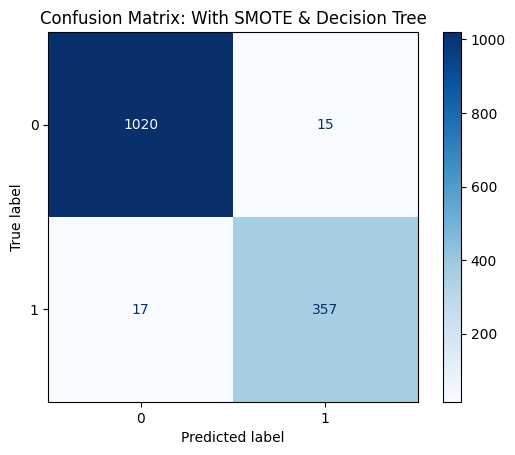

In [240]:
# Confusion matrix for model with SMOTE
cm1 = confusion_matrix(yt, y_pred3)
disp1 = ConfusionMatrixDisplay(confusion_matrix=cm1, display_labels=model.classes_)
disp1.plot(cmap='Blues')
plt.title("Confusion Matrix: With SMOTE & Decision Tree")


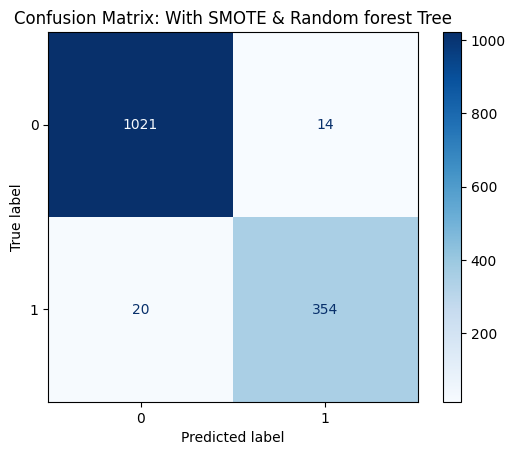

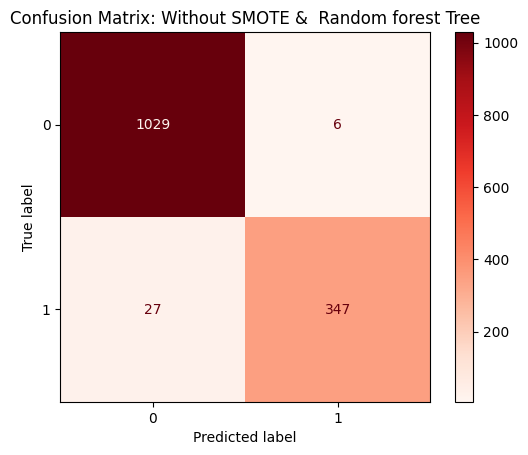

In [241]:
# Confusion matrix for model with SMOTE
cm1 = confusion_matrix(yt, y_pred)
disp1 = ConfusionMatrixDisplay(confusion_matrix=cm1, display_labels=model.classes_)
disp1.plot(cmap='Blues')
plt.title("Confusion Matrix: With SMOTE & Random forest Tree")

# Confusion matrix for model without SMOTE
cm2 = confusion_matrix(yt, y_pred2)
disp2 = ConfusionMatrixDisplay(confusion_matrix=cm2, display_labels=model2.classes_)
disp2.plot(cmap='Reds')
plt.title("Confusion Matrix: Without SMOTE &  Random forest Tree")
plt.show()


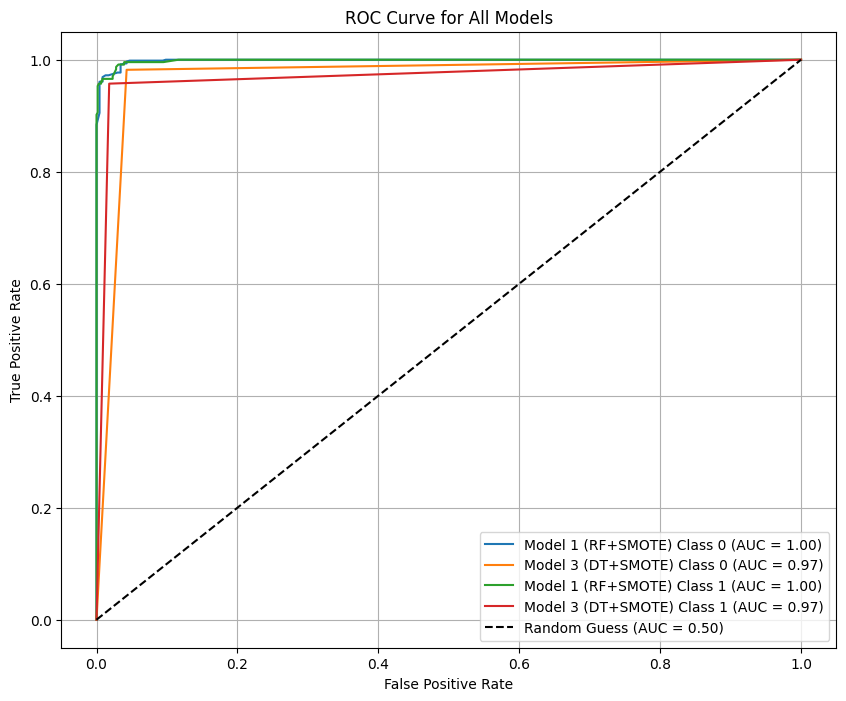

In [246]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.metrics import RocCurveDisplay
import numpy as np

# Step 1: Binarize the labels (for multi-class ROC curve)
classes = list(set(y_train_resampled))  # Unique classes
y_test_binarized = label_binarize(y_test, classes=classes)
if y_test_binarized.shape[1] == 1:
    # If binary, add a second column (1 - probability) to match the expected format
    y_test_binarized = np.hstack((1 - y_test_binarized, y_test_binarized))

# Step 2: Get predicted probabilities
y_proba1 = model.predict_proba(X_test)
y_proba3 = model3.predict_proba(X_test)

# Step 3: Create ROC curves for each class (One-vs-All)
plt.figure(figsize=(10, 8))

for i, class_label in enumerate(classes):
    # ROC for model 1
    fpr1, tpr1, _ = roc_curve(y_test_binarized[:, i], y_proba1[:, i])
    roc_auc1 = auc(fpr1, tpr1)
    plt.plot(fpr1, tpr1, label=f'Model 1 (RF+SMOTE) Class {class_label} (AUC = {roc_auc1:.2f})')

    # ROC for model 3
    fpr3, tpr3, _ = roc_curve(y_test_binarized[:, i], y_proba3[:, i])
    roc_auc3 = auc(fpr3, tpr3)
    plt.plot(fpr3, tpr3, label=f'Model 3 (DT+SMOTE) Class {class_label} (AUC = {roc_auc3:.2f})')

# Step 4: Plot settings
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess (AUC = 0.50)')
plt.title('ROC Curve for All Models')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='best')
plt.grid()
plt.show()


#Future Work
***Finding the Churn Reason***

In [ ]:
features= [
    'Age', 'Senior Citizen', 'Unlimited Data', 'Monthly Charge', 'Churn Score',
    'Tenure in Months', 'Online Backup', 'Online Security',
    'Satisfaction Score','Churn','Churn Reason'
]
test_df = df[features]
test_df.head()

In [ ]:
test_df.fillna("Don't know", inplace=True)

In [ ]:
test_df["Churn Reason"].value_counts()

In [ ]:
test_df["Churn Reason"] = test_df["Churn Reason"].replace(
    ["Don't know", "Deceased", "Poor expertise of phone support", "Lack of self-service on Website","Lack of affordable download/upload speed","Moved"], "Other"
)


In [ ]:
test_df["Churn Reason"] = test_df["Churn Reason"].replace(
    {
        "Competitor had better devices": "Competitor Advantage",
        "Competitor made better offer": "Competitor Advantage",
        "Competitor offered more data": "Competitor Advantage",
        "Competitor offered higher download speeds": "Competitor Advantage",
        "Limited range of services": "Service dissatisfaction",
        "Poor expertise of online support": "Service Issues",
        "Network reliability": "Service Issues",
        "Price too high": "Service Issues",
        "Extra data charges": "Service Issues",
    }
)
test_df["Churn Reason"].value_counts()

In [ ]:
# Count plot of the updated Churn Reason categories
sns.countplot(y="Churn Reason", data=test_df, order=test_df["Churn Reason"].value_counts().index)
plt.title("Updated Churn Reason Distribution")
plt.xlabel("Count")
plt.ylabel("Churn Reason")
plt.show()


In [ ]:
from sklearn.ensemble import RandomForestClassifier
numeric_cols = df.select_dtypes(include=['number']).columns
df = df[numeric_cols]
# Train a Random Forest model
rf = RandomForestClassifier(random_state=42)
rf.fit(df, test_df['Churn Reason'])

# Extract feature importances
feature_importance = pd.DataFrame({
    "Feature": df.columns,
    "Importance": rf.feature_importances_
}).sort_values(by="Importance", ascending=False)

print(feature_importance)


In [ ]:
# new_df_two = df["Churn", "Satisfaction Score", "Churn Score", "CLTV", "Tenure in Months", "Monthly Charge"]
featurestwo = [ 'Age', 'Senior Citizen', 'Unlimited Data', 'Monthly Charge', 'Churn Score','CLTV',
    'Tenure in Months',
    'Satisfaction Score','Churn']
new_df_two = df[featurestwo]
new_df_two['Churn Reason'] =  test_df['Churn Reason']
new_df_two.head()

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
new_df_two["Churn Reason Encoded"] = le.fit_transform(test_df["Churn Reason"])
new_df_two


In [ ]:
new_df_two['Churn Reason Encoded'].value_counts()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE

# Filter out 'Other' values from 'Churn Reason'
new_df_two = new_df_two.drop(new_df_two[new_df_two['Churn Reason'] == 'Other'].index)

# Step 1: Split data
X_train, X_test, y_train, y_test = train_test_split(new_df_two.drop(['Churn Reason', 'Churn Reason Encoded'], axis=1), new_df_two['Churn Reason Encoded'], test_size=0.2, random_state=42)

# Step 2: Apply SMOTE to handle class imbalance
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Step 3: Define class weights - giving more weight to underrepresented classes
class_weights = {
    4: 1,   # Price too high (or other)
}

# Step 4: Train model with the adjusted class weights
model = RandomForestClassifier(class_weight="balanced" )
model.fit(X_train_resampled, y_train_resampled)

# Step 5: Train model without SMOTE (for comparison)
model2 = LogisticRegression(class_weight="balanced")
model2.fit(X_train, y_train)

# Step 6: Evaluate models
y_pred = model.predict(X_test)
y_pred2 = model2.predict(X_test)
print("\n------- 1st report with SMOTE -------\n" + classification_report(y_test, y_pred))
print("\n------- 2nd report without SMOTE -------\n" + classification_report(y_test, y_pred2))
